In [1]:
!pip install roboflow
!pip install ultralytics

from roboflow import Roboflow
rf = Roboflow(api_key="Lwd2FWczuaMAAS5dJYuz")
project = rf.workspace("tes-kk2t5").project("lidm_flowchartdetection-q1vkr")
version = project.version(5)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 126.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to LIDM_FlowchartDetection-5 in yolov8:: 100%|██████████| 2194/2194 [00:00<00:00, 7036.21it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
import os

dataset_path = dataset.location
print(f"Dataset location: {dataset_path}")
print("\nDataset structure:")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:2]:
        print(f'{subindent}{file}')
    if len(files) > 2:
        print(f'{subindent}... dan {len(files)-5} file lainnya')

Dataset location: /content/LIDM_FlowchartDetection-5

Dataset structure:
LIDM_FlowchartDetection-5/
  README.dataset.txt
  README.roboflow.txt
  ... dan -2 file lainnya
  valid/
    labels/
      WIN_20251112_20_35_55_Pro_jpg.rf.795f04ff6c0f2ea59dc758f745330785.txt
      WIN_20251112_20_35_01_Pro_jpg.rf.6ea8e99b5f29dac230aa636fc1852e8a.txt
      ... dan 11 file lainnya
    images/
      WIN_20251112_20_35_53_Pro_jpg.rf.07b249ef20cb7068902405a6286e00a3.jpg
      Photo-from-2025-11-12-20-26-26_495147_jpeg.rf.c5cd40c40779a0b9cc9fcd304ed70ec7.jpg
      ... dan 11 file lainnya
  test/
    labels/
      WIN_20251112_20_28_19_Pro_jpg.rf.830d2cb39d7e76d723114dda8308435e.txt
      WIN_20251112_20_28_41_Pro_jpg.rf.c7d4b4b2dc8235cc414256f23559b5e2.txt
      ... dan 5 file lainnya
    images/
      WIN_20251112_20_28_19_Pro_jpg.rf.830d2cb39d7e76d723114dda8308435e.jpg
      Photo-from-2025-11-12-20-27-09_742685_jpeg.rf.314b908cdf305e9c5a61599828158f6a.jpg
      ... dan 5 file lainnya
  train/
    l

In [3]:
print(project.classes)

{'output': 0, 'process': 106, 'decision': 114, 'startEnd': 84, 'inputOutput': 78}


In [6]:
import yaml

path_yaml = f"{dataset.location}/data.yaml"

with open(path_yaml, 'r') as stream:
    data = yaml.safe_load(stream)
    names = data['names']

    if isinstance(names, list):
        for i, name in enumerate(names):
            print(f"Class {i}: {name}")
    else:
        for id_class, name in names.items():
            print(f"Class {id_class}: {name}")

Class 0: decision
Class 1: inputOutput
Class 2: process
Class 3: startEnd


## Train model

In [3]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # nano
# model = YOLO('yolov8s.pt')  # small
# model = YOLO('yolov8m.pt')  # medium
# model = YOLO('yolov8l.pt')  # large
# model = YOLO('yolov8x.pt')  # xlarge

results = model.train(
    data=f'{dataset_path}/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    name='flowchart_detection',
    patience=20,
    save=True,
    device=0,
    workers=8,
    project='runs/detect',
)


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/LIDM_FlowchartDetection-5/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=flowchart_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspect

## Evaluasi model

In [5]:
metrics = model.val()

print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")



Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1197.2±635.9 MB/s, size: 48.4 KB)
val: Scanning /content/LIDM_FlowchartDetection-5/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 16/16 30.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.6it/s 0.6s
                   all         16         16      0.952      0.998      0.995      0.866
              decision          5          5      0.978          1      0.995      0.861
           inputOutput          2          2          1      0.993      0.995      0.796
               process          2          2      0.853          1      0.995      0.895
              startEnd          7          7      0.977          1      0.995      0.912
Speed: 1.6ms preprocess, 5.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /content/runs/det

## Inference

In [6]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

test_images = glob.glob(f'{dataset_path}/test/images/*')

print(f"\nTotal test images: {len(test_images)}")
print("Running inference on test set...")

test_results = model.predict(
    source=f'{dataset_path}/test/images',
    save=True,
    conf=0.25,
    iou=0.45,
    name='test_predictions'
)


Total test images: 10
Running inference on test set...

image 1/10 /content/LIDM_FlowchartDetection-5/test/images/Photo-from-2025-11-12-20-26-32_406670_jpeg.rf.6114e50bce0d3bc1749a6c7b4eb4c456.jpg: 640x640 1 decision, 1 inputOutput, 9.3ms
image 2/10 /content/LIDM_FlowchartDetection-5/test/images/Photo-from-2025-11-12-20-27-09_742685_jpeg.rf.314b908cdf305e9c5a61599828158f6a.jpg: 640x640 1 decision, 7.8ms
image 3/10 /content/LIDM_FlowchartDetection-5/test/images/Photo-from-2025-11-12-20-27-40_422884_jpeg.rf.1939776f89048081f4c589ec38e172b5.jpg: 640x640 1 process, 7.9ms
image 4/10 /content/LIDM_FlowchartDetection-5/test/images/WIN_20251112_20_28_19_Pro_jpg.rf.830d2cb39d7e76d723114dda8308435e.jpg: 640x640 1 startEnd, 8.5ms
image 5/10 /content/LIDM_FlowchartDetection-5/test/images/WIN_20251112_20_28_41_Pro_jpg.rf.c7d4b4b2dc8235cc414256f23559b5e2.jpg: 640x640 1 startEnd, 9.3ms
image 6/10 /content/LIDM_FlowchartDetection-5/test/images/WIN_20251112_20_29_31_Pro_jpg.rf.9260b3f8e74268dfb4f15087


image 1/1 /content/LIDM_FlowchartDetection-5/test/images/WIN_20251112_20_28_19_Pro_jpg.rf.830d2cb39d7e76d723114dda8308435e.jpg: 640x640 1 startEnd, 7.3ms
Speed: 1.9ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/LIDM_FlowchartDetection-5/test/images/Photo-from-2025-11-12-20-27-09_742685_jpeg.rf.314b908cdf305e9c5a61599828158f6a.jpg: 640x640 1 decision, 7.3ms
Speed: 1.9ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/LIDM_FlowchartDetection-5/test/images/WIN_20251112_20_30_26_Pro_jpg.rf.750c0c05bcb1a91e26fc8f81f77c3225.jpg: 640x640 1 startEnd, 7.3ms
Speed: 1.9ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/LIDM_FlowchartDetection-5/test/images/WIN_20251112_20_37_17_Pro_jpg.rf.3505e16761c45875d15c2da4de23be0b.jpg: 640x640 1 startEnd, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape 

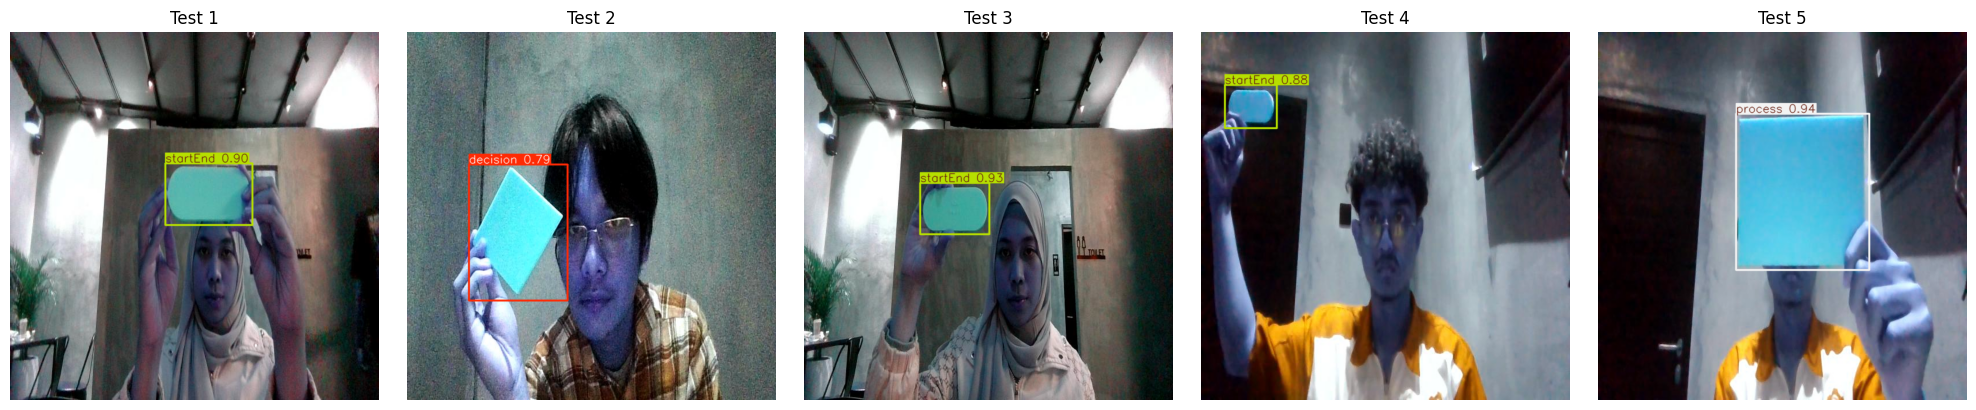

In [7]:
num_samples = 5
fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))

for idx, img_path in enumerate(test_images[:num_samples]):
    results = model.predict(img_path, conf=0.25)

    img_with_boxes = results[0].plot()

    axes[idx].imshow(img_with_boxes)
    axes[idx].axis('off')
    axes[idx].set_title(f'Test {idx+1}')

plt.tight_layout()
plt.show()

## Save model

In [8]:
from google.colab import drive
import os

drive.mount('/content/drive')

drive_folder = '/content/drive/MyDrive/lidm'
os.makedirs(drive_folder, exist_ok=True)

import shutil

local_best = 'runs/detect/flowchart_detection/weights/best.pt'
local_last = 'runs/detect/flowchart_detection/weights/last.pt'

drive_best = '/content/drive/MyDrive/lidm/best.pt'
drive_last = '/content/drive/MyDrive/lidm/last.pt'

if os.path.exists(local_best):
    shutil.copy(local_best, drive_best)
    print(f"Best model saved: {drive_best}")
else:
    print("Best model not found")

if os.path.exists(local_last):
    shutil.copy(local_last, drive_last)
    print(f"Last model saved: {drive_last}")
else:
    print("Last model not found")

from ultralytics import YOLO

Mounted at /content/drive
Best model saved: /content/drive/MyDrive/lidm/best.pt
Last model saved: /content/drive/MyDrive/lidm/last.pt
